In [115]:
import numpy as np
import pandas as pd

#   Cargamos los datos
datos = pd.read_csv("water_potability.csv")
means = datos.mean(axis=0, skipna=True)

for e in datos:
    datos[e] = datos[e].fillna(means[e])
    

X = datos.iloc[:,:-1]
Y = datos.iloc[:,-1]
Y = np.asmatrix(Y)
#Hasta aqui datos cargados y sustituimos los nan por la media

In [128]:
def normalize1(df):
    result = df.copy()
    for feature_name in df.columns:
        mean = df[feature_name].mean()
        std = df[feature_name].std()
        result[feature_name] = (df[feature_name] - mean) / std
    return result

def normalize2(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

#definimos funciones de normalizacion
X_norm1 = normalize1(X)
X_norm2 = normalize2(X)
X_matrix1 = np.asmatrix(X_norm1)
X_matrix2 = np.asmatrix(X_norm2)
filas = np.shape(X_matrix1)[0]
columnas = np.shape(X_matrix1)[1]

In [130]:
print(Y)

[[0 0 0 ... 1 1 1]]


ValueError: shapes (3276,9) and (10,) not aligned: 9 (dim 1) != 10 (dim 0)

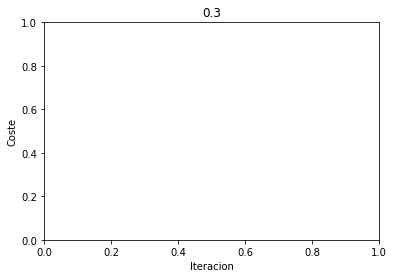

In [132]:
X_norm = np.hstack([np.ones([filas,1]),X_matrix1])

#   Funcion de coste
def fun_coste(X,Y,theta):
    hip = np.dot(X, theta)
    aux = (hip - Y) **2
    return aux.sum() / (2 * filas)

# Metodo de descenso de gradiente vectorizado
def gradiente(X, Y, theta, alpha):
    th = theta
    for i in range(columnas):
        aux = ((np.dot(X, theta) - Y) * X[:, i])
        th[i] -= ((alpha/filas) * aux.sum())
    return th, fun_coste(X, Y, th)

# Ecuacion normal
def ecuacion_normal(X, Y):
    X= np.hstack([np.ones([filas,1]),X])
    th = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(Y)
    return th

# Pruebas con alpha
for alpha in [0.3, 0.1, 0.03, 0.01]:
    theta = np.zeros(columnas + 1)
    costes = []
    plt.figure(1)
    plt.title(alpha)
    plt.xlabel('Iteracion')
    plt.ylabel('Coste')
    
    for i in range(500):
        Theta, cost = gradiente(X_matrix1, Y, theta, alpha)
        costes.append(cost)
    
    plt.plot(costes)
    plt.show()
    print('Coste final:', cost)
    print('Theta final:', theta)

# Comprobacion de las funciones
# Calculamos las thetas
thg = np.zeros(columnas + 1)
alpha = 0.1

for i in range(3000):
    thg, cost = gradiente(X_norm, Y_norm, thg, alpha)

the = ecuacion_normal(X, Y)

# Creamos datos de prueba y los normalizamos
casa = np.array([1650,3]) 
casa_norm = (casa - mu[:-1])
casa_norm = casa_norm / sigma[:-1]

# Prediccion con descenso del gradiente
gradient_predict = np.matmul(np.append(np.array([1]),casa_norm), thg) * sigma[-1]
gradient_predict = gradient_predict + mu[-1]

# Prediccion con ecuación normal
normal_predict = np.matmul(np.append(np.array([1]),casa), the)

print('Precio con', casa[0], 'pies cuadrados y', casa[1], 'habitaciones:')
print('Resultado con descenso del gradiente:', gradient_predict)
print('Resultado con ecuación normal:', normal_predict)